サンプルデータの先頭5行:
      name   age      city  score
0    Alice  25.0  New York   85.0
1      Bob  30.0    London   92.0
2  Charlie  35.0     Paris   88.0
3    David  40.0     Tokyo   75.0
4      Eve  28.0    Berlin   90.0

データ型:
name      object
age      float64
city      object
score    float64
dtype: object

欠損値の確認:
name     0
age      2
city     0
score    1
dtype: int64

都市ごとのスコアの平均:
city
Berlin      90.0
London      93.5
Moscow      87.0
New York    85.0
Paris       78.0
Tokyo       75.0
Name: score, dtype: float64


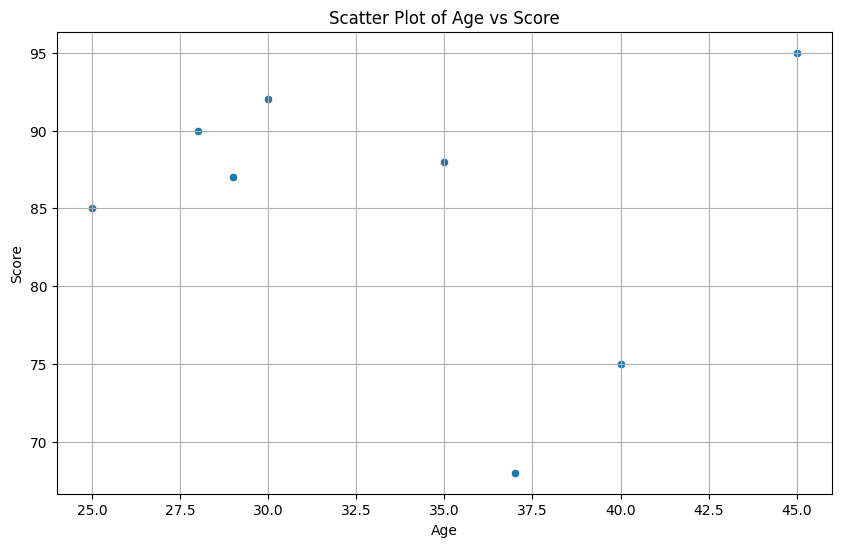

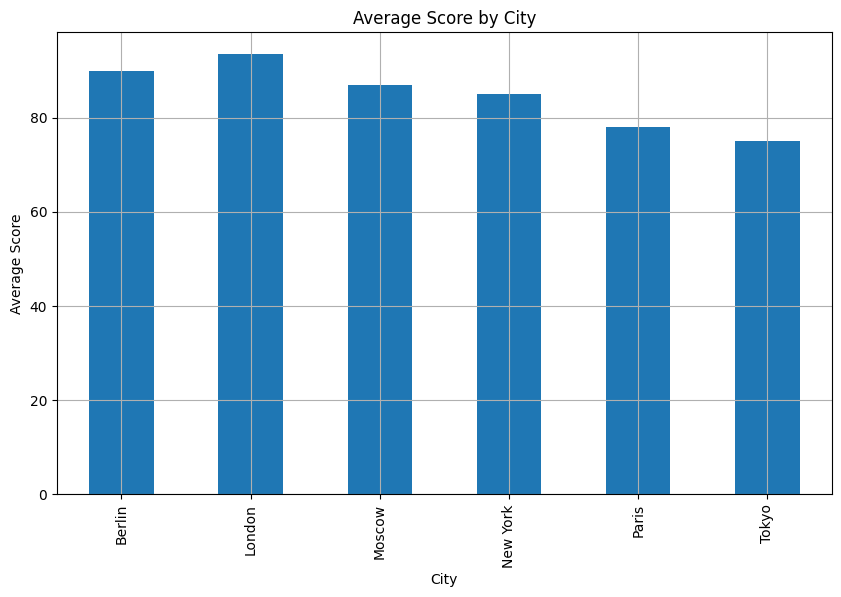

In [ ]:
#実践9-1
'''以下のサンプルデータを作成してください。
data = {
  'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Julia', 'Kevin', 'Liam', 'Maya', 'Noah'],
  'age': [25, 30, 35, 40, 28, None, 32, 22, 45, 37, 51, 24, 29, None],
  'city': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney', 'New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney'],
  'score': [85, 92, 88, 75, 90, 82, None, 79, 95, 68, 81, 72, 87, 63]
}
以下の前処理（含む可視化）を実施してください
サンプルデータ(name, age, city, score)を作成
データの確認(先頭行、データ型など)
欠損値の確認と除外
年齢の外れ値(25歳未満、45歳超)の除外
スコアの平均を計算し、新しい列に追加
都市ごとのスコアの平均を計算
年齢とスコアの関係を散布図で可視化
都市ごとのスコアの分布を棒グラフで可視化'''


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# サンプルデータの作成
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Julia', 'Kevin', 'Liam', 'Maya', 'Noah'],
    'age': [25, 30, 35, 40, 28, None, 32, 22, 45, 37, 51, 24, 29, None],
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney', 'New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney'],
    'score': [85, 92, 88, 75, 90, 82, None, 79, 95, 68, 81, 72, 87, 63]
}

# データフレームの作成
df = pd.DataFrame(data)

# データの確認
#df.dtypes:データ型のチェック
print("サンプルデータの先頭5行:")
print(df.head())
print("\nデータ型:")
print(df.dtypes)

# 欠損値の確認と除外
print("\n欠損値の確認:")
print(df.isnull().sum())
df = df.dropna()

# 年齢の外れ値（25歳未満、45歳超）の除外
df = df[(df['age'] >= 25) & (df['age'] <= 45)]

# スコアの平均を計算し、新しい列に追加
df['score_mean'] = df['score'].mean()

# 都市ごとのスコアの平均を計算
city_score_mean = df.groupby('city')['score'].mean()
print("\n都市ごとのスコアの平均:")
print(city_score_mean)

# 年齢とスコアの関係を散布図で可視化
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='score')
plt.title('Scatter Plot of Age vs Score')
plt.xlabel('Age')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# 都市ごとのスコアの分布を棒グラフで可視化
plt.figure(figsize=(10, 6))
city_score_mean.plot(kind='bar')
plt.title('Average Score by City')
plt.xlabel('City')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()


データの基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

データの統計量:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


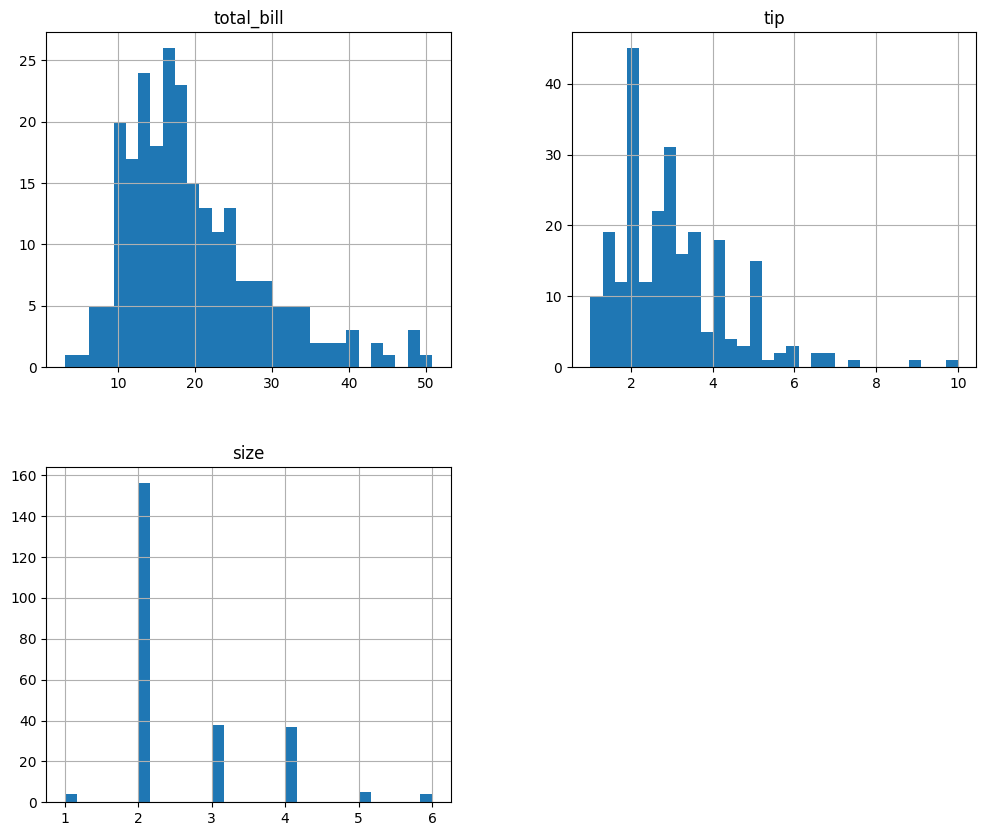

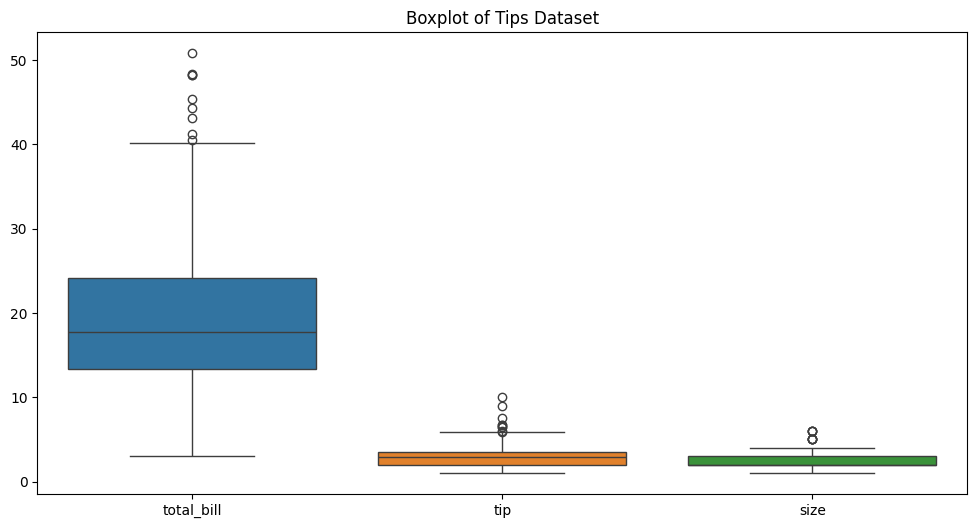


チップの割合(%)が追加されたデータの先頭5行:
   total_bill   tip     sex smoker  day    time  size  tip_percentage
0       16.99  1.01  Female     No  Sun  Dinner     2        5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3       16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3       16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2       13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4       14.680765

'smoker'カラムが変換されたデータの先頭5行:
   total_bill   tip     sex smoker  day    time  size  tip_percentage
0       16.99  1.01  Female      0  Sun  Dinner     2        5.944673
1       10.34  1.66    Male      0  Sun  Dinner     3       16.054159
2       21.01  3.50    Male      0  Sun  Dinner     3       16.658734
3       23.68  3.31    Male      0  Sun  Dinner     2       13.978041
4       24.59  3.61  Female      0  Sun  Dinner     4       14.680765
dayカラムの型(変更前):
category

'day'カラムの型(変更後):
category


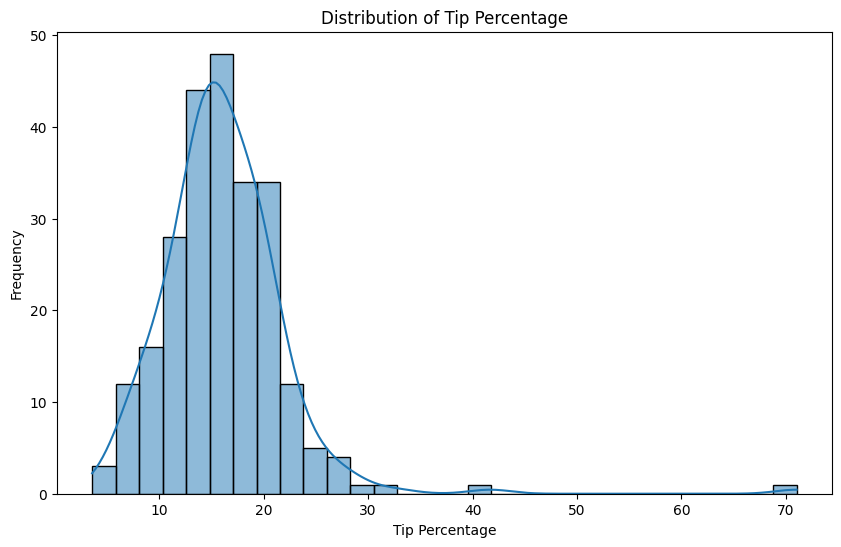

<ipython-input-4-812fee1bdc22>:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=tips, x='day', y='tip_percentage', kind='bar', hue='time', ci=None)


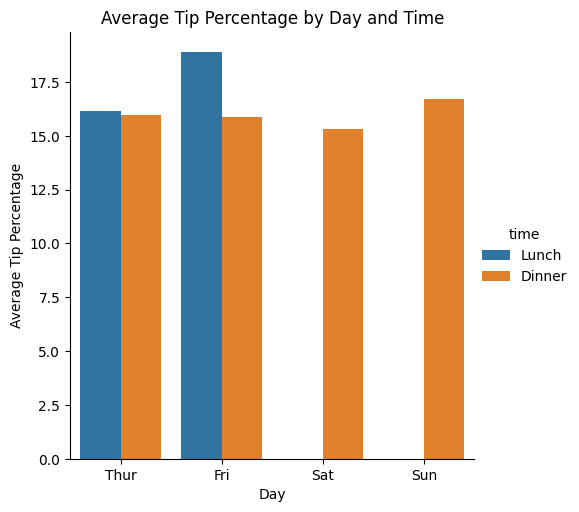


'性別'カラムが削除されたデータの先頭5行:
   total_bill   tip smoker  day    time  size  tip_percentage
0       16.99  1.01      0  Sun  Dinner     2        5.944673
1       10.34  1.66      0  Sun  Dinner     3       16.054159
2       21.01  3.50      0  Sun  Dinner     3       16.658734
3       23.68  3.31      0  Sun  Dinner     2       13.978041
4       24.59  3.61      0  Sun  Dinner     4       14.680765


In [ ]:
#実践9-2(応用)
'''
total_bill: 会計総額
tip: 支払われたチップ
sex: 支払い主の性別
smoker: 喫煙者かどうか
day: 来店日(Sun, Sat, Thur, Fri)
time: 時間帯(Dinner, Lunch)
size: 同伴者の人数
このデータの特徴を確認して説明してください。(基礎分析)
外れ値がないか確認してください。
チップの割合(%)を新しい列として作成してください
"smoker"カラムを機械学習に適した値(1 or 0) に変換してください。
dayカラムの型を確認し、category型に変換してください。(ヒント: astypeを利用する)
チップの割合の分布を可視化してください。その際、可能ならseabornを利用してください。
sns.catplot(棒グラフ)を使ってチップの割合以外を可視化してください。
何かしら不要と思われる列を削除してください。'''

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# データセットのロード
tips = sns.load_dataset("tips")

# データの基本情報の確認
print("データの基本情報:")
print(tips.info())
print("\nデータの統計量:")
print(tips.describe())
tips.hist(bins=30, figsize=(12, 10))


# 外れ値の確認
plt.figure(figsize=(12, 6))
sns.boxplot(data=tips)
plt.title("Boxplot of Tips Dataset")
plt.show()

# チップの割合(%)を新しい列として作成
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100
print("\nチップの割合(%)が追加されたデータの先頭5行:")
print(tips.head())

# "smoker"カラムを機械学習に適した値(1 or 0) に変換
tips['smoker'] = tips['smoker'].map({'Yes': 1, 'No': 0})
print("\n'smoker'カラムが変換されたデータの先頭5行:")
print(tips.head())


# dayカラムの型を確認
print("dayカラムの型(変更前):")
print(tips['day'].dtype)

# dayカラムの型をcategory型に変換
tips['day'] = tips['day'].astype('category')
print("\n'day'カラムの型(変更後):")
print(tips['day'].dtype)

# チップの割合の分布を可視化
plt.figure(figsize=(10, 6))
sns.histplot(tips['tip_percentage'], bins=30, kde=True)
plt.title("Distribution of Tip Percentage")
plt.xlabel("Tip Percentage")
plt.ylabel("Frequency")
plt.show()

# sns.catplotを使ってチップの割合以外を可視化
sns.catplot(data=tips, x='day', y='tip_percentage', kind='bar', hue='time', ci=None)
plt.title("Average Tip Percentage by Day and Time")
plt.xlabel("Day")
plt.ylabel("Average Tip Percentage")
plt.show()

# 不要と思われる列を削除
tips_cleaned = tips.drop(columns=['sex'])
print("\n'性別'カラムが削除されたデータの先頭5行:")
print(tips_cleaned.head())
